In [24]:
import pandas as pd
import numpy as np

In [25]:
ndvi_df = pd.read_csv(r'geo_indexes\0101\ndvi_0101_from_api.csv')
ndvi_df = ndvi_df.rename(columns={
    '0101_NDVI-C0/date': 'date',
    '0101_NDVI-C0/mean': 'mean'
})
ndvi_df

,date,0101_NDVI-C0/min,0101_NDVI-C0/max,mean,0101_NDVI-C0/stDev,0101_NDVI-C0/sampleCount,0101_NDVI-C0/noDataCount,0101_NDVI-C0/cloudCoveragePercent
0,2020-01-01T00:00:00Z,-0.017693,0.036042,0.005780,0.007365,21684,681,27.619864
1,2020-01-06T00:00:00Z,-0.037835,0.104809,0.031701,0.016305,21684,681,100.000000
2,2020-01-11T00:00:00Z,-0.048544,0.044845,-0.001728,0.011591,21684,681,100.000000
3,2020-01-16T00:00:00Z,0.380088,0.870275,0.723141,0.066110,21684,681,0.000000
4,2020-01-21T00:00:00Z,0.012436,0.048240,0.030788,0.004434,21684,681,100.000000
...,...,...,...,...,...,...,...,...
358,2024-12-10T00:00:00Z,-0.106557,0.194515,0.061749,0.038556,21684,681,75.322573
359,2024-12-15T00:00:00Z,-0.013564,0.139919,0.033188,0.015289,21684,681,100.000000
360,2024-12-20T00:00:00Z,0.121495,0.535777,0.214830,0.054998,21684,681,0.000000
361,2024-12-25T00:00:00Z,0.014099,0.051125,0.032082,0.004487,21684,681,100.000000


In [26]:
ndvi_df[['date', 'mean']].to_csv('ndvi-101-2022.csv')

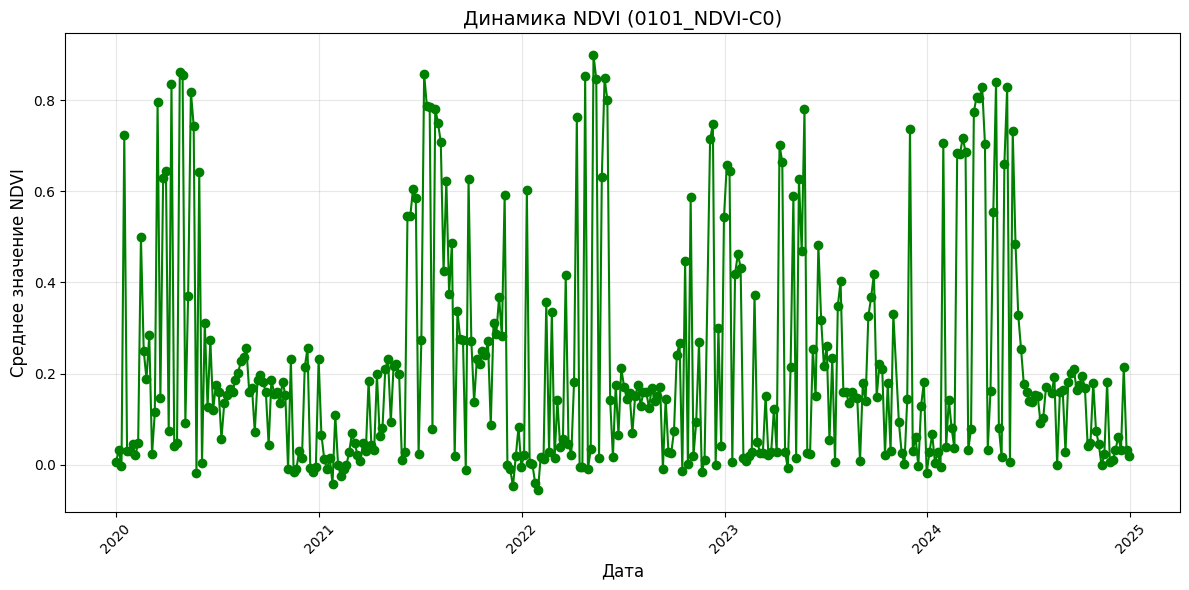

In [27]:
import matplotlib.pyplot as plt

# Предположим, ваш DataFrame уже существует и называется df
# Если нужно прочитать данные из файла, используйте:
# df = pd.read_csv('ваш_файл.csv')

# Преобразуем столбец с датами в правильный формат
ndvi_df['date'] = pd.to_datetime(ndvi_df['date'])


# Создаем график
plt.figure(figsize=(12, 6))
plt.plot(ndvi_df['date'], 
         ndvi_df['mean'], 
         marker='o', 
         linestyle='-', 
         color='green')

# Настраиваем оформление графика
plt.title('Динамика NDVI (0101_NDVI-C0)', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Среднее значение NDVI', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# Показать график
plt.show()

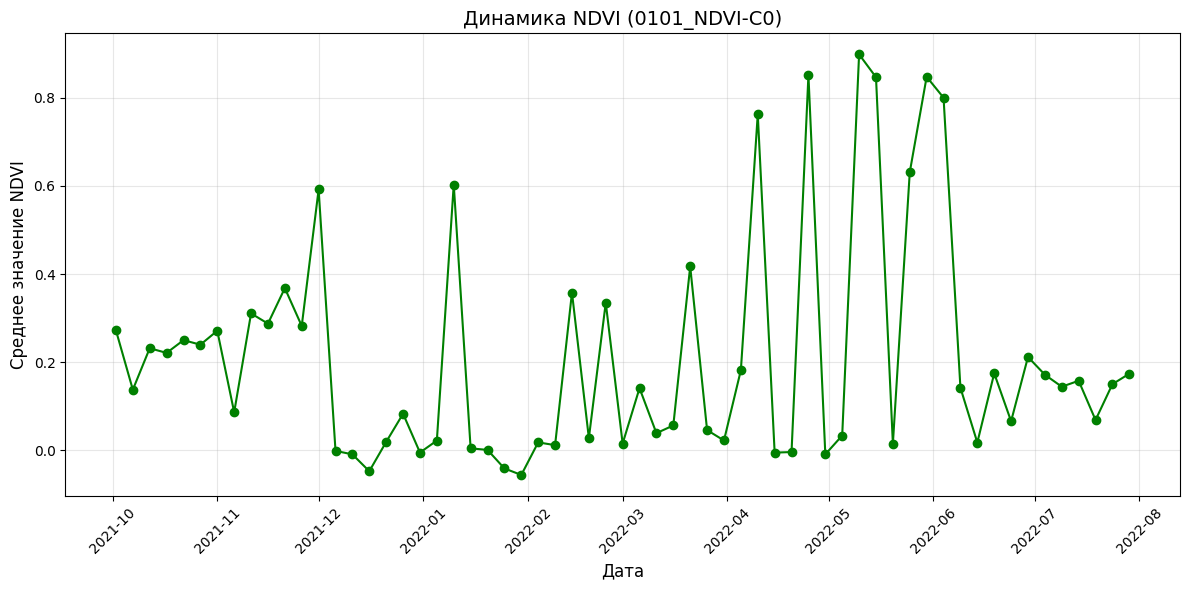

In [28]:
start_date, end_date = ('2021-10-01', '2022-07-31')

ndvi_df_2022 = ndvi_df[(ndvi_df['date'] >= start_date) & (ndvi_df['date'] <= end_date)]

# Создаем график
plt.figure(figsize=(12, 6))
plt.plot(ndvi_df_2022['date'], 
         ndvi_df_2022['mean'], 
         marker='o', 
         linestyle='-', 
         color='green')

# Настраиваем оформление графика
plt.title('Динамика NDVI (0101_NDVI-C0)', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Среднее значение NDVI', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# Показать график
plt.show()

Удалено выбросов: 0


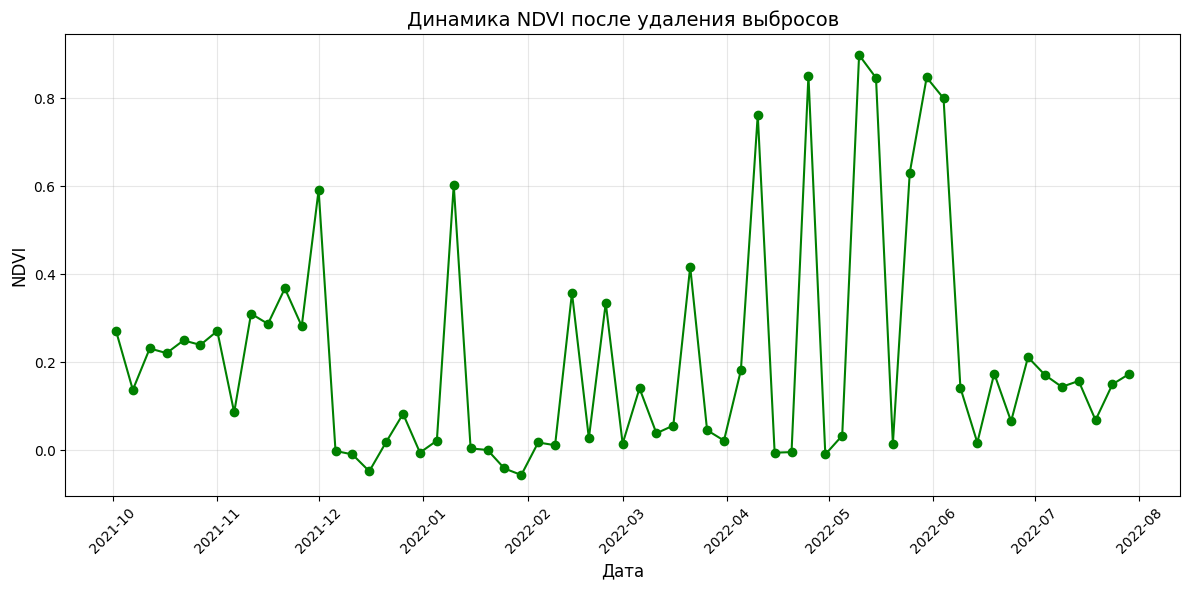

In [29]:
import pandas as pd
import numpy as np

# Рассчитаем Z-показатели для столбца с данными
z_scores = (ndvi_df_2022['mean'] - ndvi_df_2022['mean'].mean()) / ndvi_df_2022['mean'].std()

# Задаем порог для обнаружения выбросов (обычно ±3)
threshold = 3

# Создаем маску для фильтрации выбросов
mask = np.abs(z_scores) < threshold

# Создаем новый DataFrame без выбросов
df_clean = ndvi_df_2022[mask].copy()

# Опционально: посчитать количество удаленных выбросов
outliers_count = len(ndvi_df_2022) - len(df_clean)
print(f"Удалено выбросов: {outliers_count}")

# Визуализация результатов (аналогично предыдущему примеру)
plt.figure(figsize=(12, 6))
plt.plot(df_clean['date'], df_clean['mean'], 
         marker='o', linestyle='-', color='green')
plt.title('Динамика NDVI после удаления выбросов', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('NDVI', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Удалено выбросов: 6


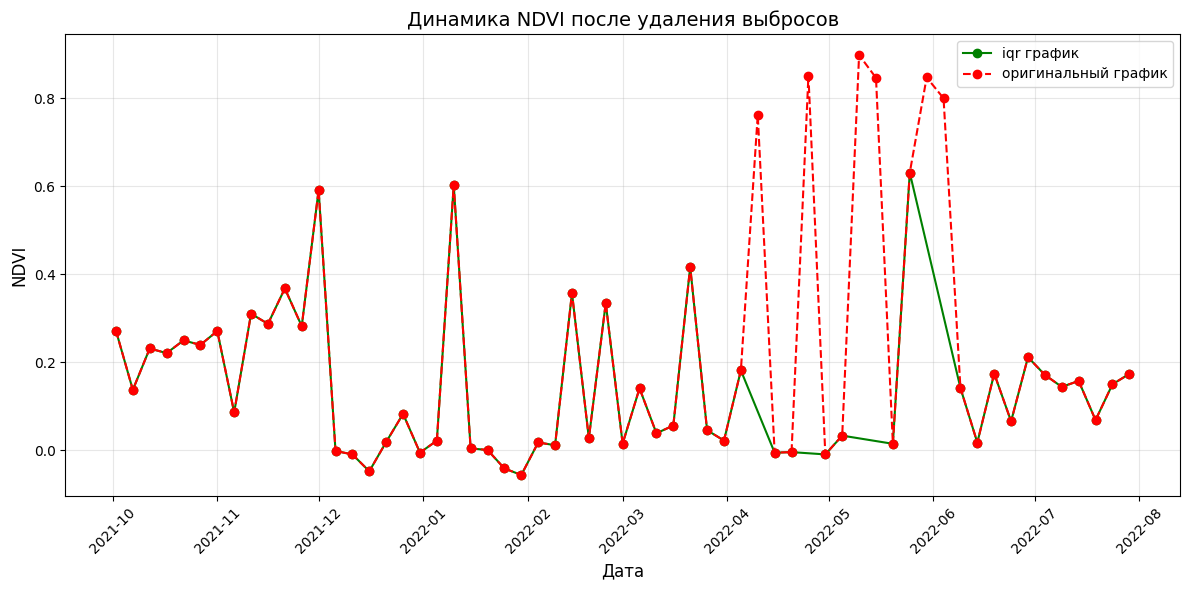

In [30]:
k = 1.5
series = ndvi_df_2022['mean'].copy()
q1, q3 = series.quantile(0.25), series.quantile(0.75)
iqr = q3 - q1
lower, upper = q1 - k*iqr, q3 + k*iqr
df_clean = ndvi_df_2022.copy()
mask = (series > lower) & (series < upper)
df_clean = df_clean[mask]

# Опционально: посчитать количество удаленных выбросов
outliers_count = len(series) - len(df_clean)
print(f"Удалено выбросов: {outliers_count}")

# Визуализация результатов (аналогично предыдущему примеру)
plt.figure(figsize=(12, 6))
plt.plot(df_clean['date'], df_clean['mean'], 
         marker='o', linestyle='-', color='green', label='iqr график')
plt.plot(ndvi_df_2022['date'], ndvi_df_2022['mean'], 
         marker='o', linestyle='--', color='red', label='оригинальный график')
plt.title('Динамика NDVI после удаления выбросов', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('NDVI', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Rolling MAD removed: 22 outliers


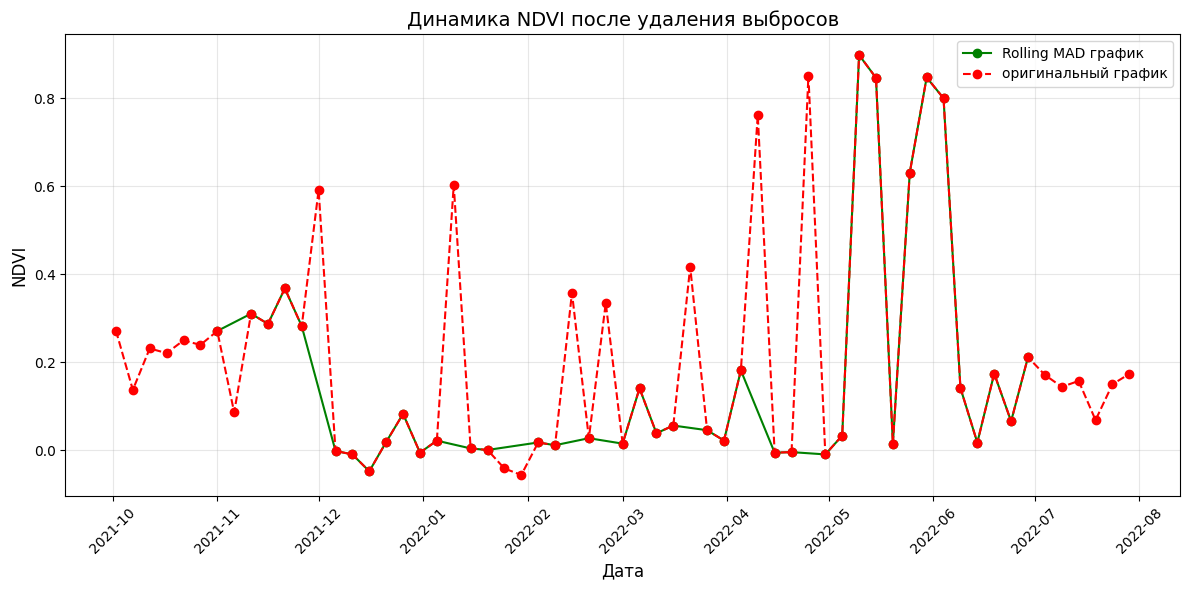

In [31]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor, NearestNeighbors


def rolling_mad_outliers(df, window=7, thresh=3.5):
    """
    Detect outliers based on rolling Median Absolute Deviation (MAD).
    window: rolling window size in days (or number of observations).
    thresh: threshold in terms of scaled MAD.
    """
    series = df['mean']
    rolling_med = series.rolling(window, center=True).median()
    mad = (series - rolling_med).abs().rolling(window, center=True).median()
    # Scale factor for consistency with standard deviation
    modified_z_score = 0.6745 * (series - rolling_med) / mad
    mask = modified_z_score.abs() < thresh
    return df[mask].copy(), mask


def rolling_iqr_outliers(df, window=7, k=1.5):
    """
    Detect outliers based on rolling Interquartile Range (IQR).
    window: rolling window size.
    k: multiplier for IQR.
    """
    series = df['mean']
    q1 = series.rolling(window, center=True).quantile(0.25)
    q3 = series.rolling(window, center=True).quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    mask = (series >= lower) & (series <= upper)
    return df[mask].copy(), mask


def isolation_forest_outliers(df, n_estimators=100, contamination=0.05, random_state=42):
    """
    Detect outliers using Isolation Forest.
    contamination: proportion of expected outliers (float in (0.,1.)).
    Returns the cleaned DataFrame and boolean mask.
    """
    iso = IsolationForest(n_estimators=n_estimators,
                          contamination=contamination,
                          random_state=random_state)
    values = df['mean'].values.reshape(-1, 1)
    preds = iso.fit_predict(values)
    # -1 for outliers, 1 for inliers
    mask = preds == 1
    return df[mask].copy(), mask


def knn_outliers(df, n_neighbors=5, contamination=0.05):
    """
    Detect outliers using k-Nearest Neighbors (LOF style).
    contamination: proportion of expected outliers.
    """
    lof = LocalOutlierFactor(n_neighbors=n_neighbors,
                              contamination=contamination,
                              novelty=False)
    values = df['mean'].values.reshape(-1, 1)
    preds = lof.fit_predict(values)
    # -1 for outliers, 1 for inliers
    mask = preds == 1
    return df[mask].copy(), mask


# Example usage
import matplotlib.dates as mdates

# Rolling MAD
df_mad, mask_mad = rolling_mad_outliers(ndvi_df_2022, window=7, thresh=3.5)
print(f"Rolling MAD removed: {len(ndvi_df_2022) - len(df_mad)} outliers")

# Визуализация результатов (аналогично предыдущему примеру)
plt.figure(figsize=(12, 6))
plt.plot(df_mad['date'], df_mad['mean'], 
         marker='o', linestyle='-', color='green', label='Rolling MAD график')
plt.plot(ndvi_df_2022['date'], ndvi_df_2022['mean'], 
         marker='o', linestyle='--', color='red', label='оригинальный график')
plt.title('Динамика NDVI после удаления выбросов', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('NDVI', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Rolling IQR removed: 9 outliers


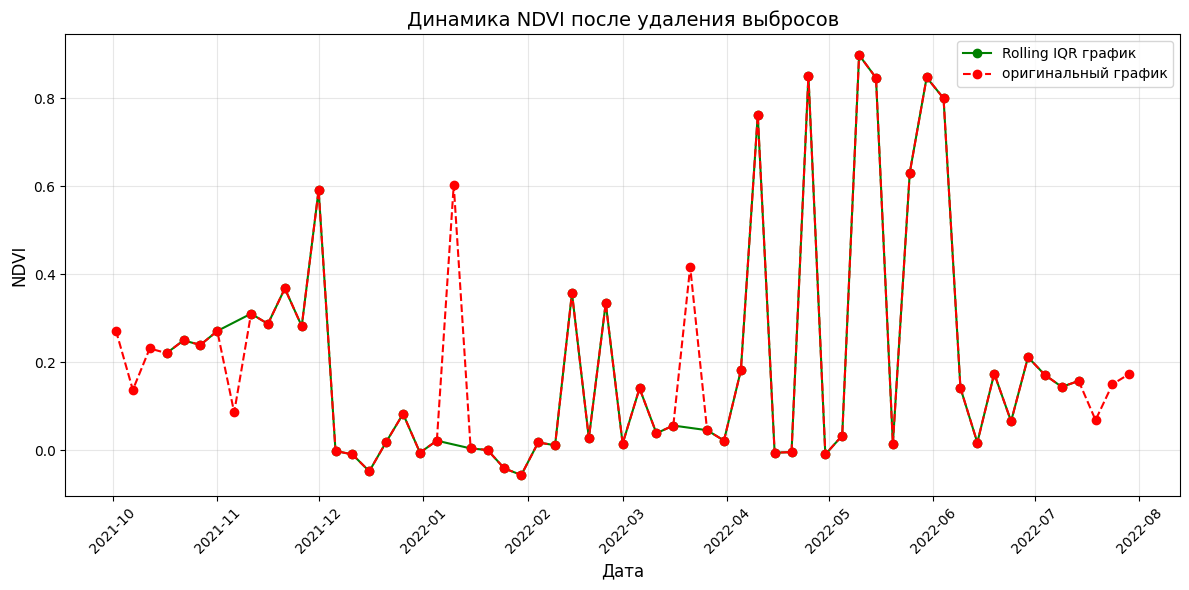

In [32]:
# Rolling IQR
df_riqr, mask_riqr = rolling_iqr_outliers(ndvi_df_2022, window=7, k=1.5)
print(f"Rolling IQR removed: {len(ndvi_df_2022) - len(df_riqr)} outliers")

# Визуализация результатов (аналогично предыдущему примеру)
plt.figure(figsize=(12, 6))
plt.plot(df_riqr['date'], df_riqr['mean'], 
         marker='o', linestyle='-', color='green', label='Rolling IQR график')
plt.plot(ndvi_df_2022['date'], ndvi_df_2022['mean'], 
         marker='o', linestyle='--', color='red', label='оригинальный график')
plt.title('Динамика NDVI после удаления выбросов', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('NDVI', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Isolation Forest removed: 3 outliers


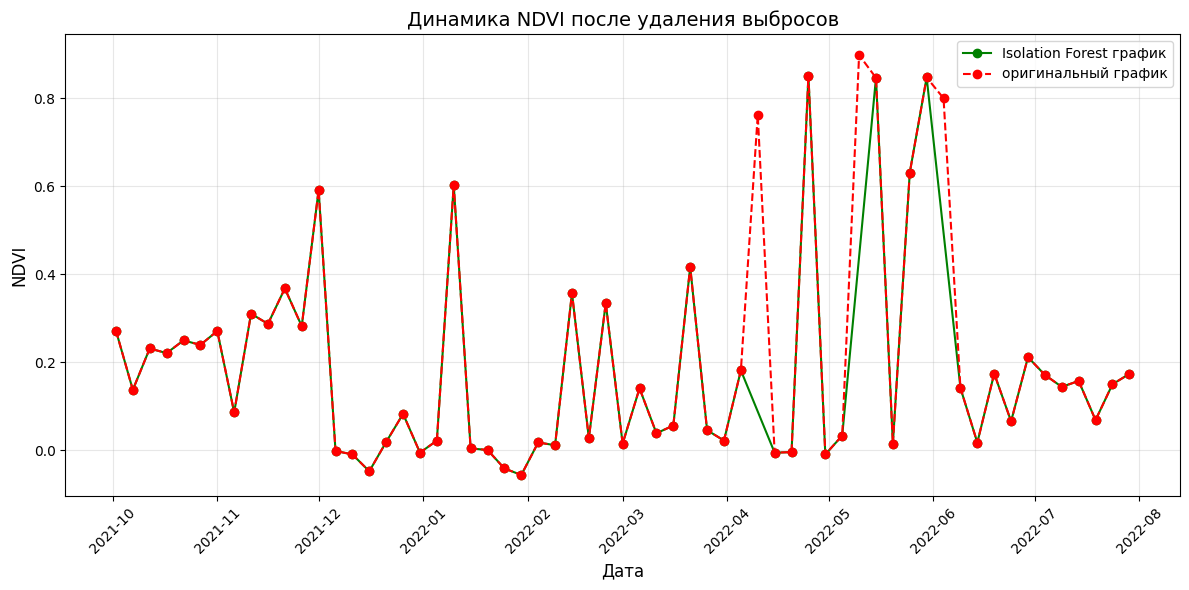

In [33]:
# Isolation Forest
df_iso, mask_iso = isolation_forest_outliers(ndvi_df_2022, contamination=0.05)
print(f"Isolation Forest removed: {len(ndvi_df_2022) - len(df_iso)} outliers")

# Визуализация результатов (аналогично предыдущему примеру)
plt.figure(figsize=(12, 6))
plt.plot(df_iso['date'], df_iso['mean'], 
         marker='o', linestyle='-', color='green', label='Isolation Forest график')
plt.plot(ndvi_df_2022['date'], ndvi_df_2022['mean'], 
         marker='o', linestyle='--', color='red', label='оригинальный график')
plt.title('Динамика NDVI после удаления выбросов', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('NDVI', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


k-NN (LOF) removed: 3 outliers


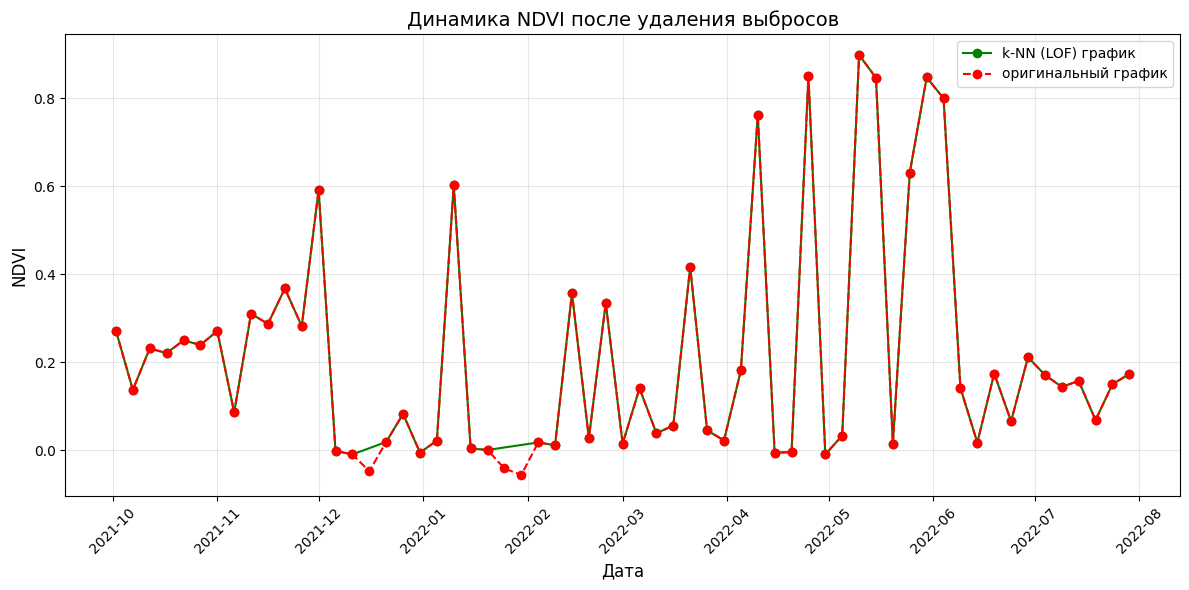

In [34]:
# k-NN (LOF)
df_knn, mask_knn = knn_outliers(ndvi_df_2022, n_neighbors=5, contamination=0.05)
print(f"k-NN (LOF) removed: {len(ndvi_df_2022) - len(df_knn)} outliers")

# Визуализация результатов (аналогично предыдущему примеру)
plt.figure(figsize=(12, 6))
plt.plot(df_knn['date'], df_knn['mean'], 
         marker='o', linestyle='-', color='green', label='k-NN (LOF) график')
plt.plot(ndvi_df_2022['date'], ndvi_df_2022['mean'], 
         marker='o', linestyle='--', color='red', label='оригинальный график')
plt.title('Динамика NDVI после удаления выбросов', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('NDVI', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
